## REGRESSION POLYNOMIALE SIMPLE AVEC NUMPY

In [1]:
# Chargement de numpy
import numpy as np
# dataset génération aléatoire avec sklearn.make_regression
from sklearn.datasets import make_regression
# pour les graphiques
import matplotlib.pyplot as plt

### 1. DATASET

In [2]:
# dataset génération aléatoire avec sklearn.make_regression
# avec vecteur Y, matrice X et vecteur teta
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)

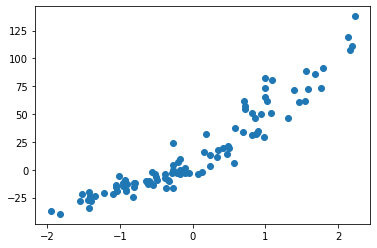

In [3]:
# visualiser y en fonction de x
plt.scatter(x, y)
plt.show()
# courbe non convexe, polynomiale de degré 2 au minimum

#### GESTION DU VECTEUR Y

In [37]:
# Vérification des dimensions de la matrice
print(x.shape) # 100 lignes, 1 colonne
print(y.shape) # 100 lignes, rien : dimension incomplète ==> la compléter reshape()

(100, 1)
(100, 1)


In [38]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


#### GESTION DE LA MATRICE X

In [54]:
# il nous faut une colonne X avec une colonne de biais : hstack
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X.shape

(100, 3)

In [55]:
X[:10]

array([[ 0.04024125, -0.20060221,  1.        ],
       [ 0.26123028, -0.51110691,  1.        ],
       [ 0.97590123,  0.98787713,  1.        ],
       [ 0.17758269,  0.42140561,  1.        ],
       [ 0.01787627,  0.13370218,  1.        ],
       [ 2.02496112, -1.42301128,  1.        ],
       [ 0.13848016, -0.37212922,  1.        ],
       [ 3.34607612, -1.82922828,  1.        ],
       [ 3.0930821 ,  1.75871604,  1.        ],
       [ 0.23460453,  0.48435992,  1.        ]])

### GESTION DU VECTEUR TETA

In [56]:
# teta non connu, on doit initilaiser téta avec des paramètres aléatoires en 3 dimension pour 3
# paramètres a, b et c
theta = np.random.randn(3, 1)
theta.shape

(3, 1)

In [42]:
theta # initialisé aléatoirement

array([[-0.35839051],
       [-1.64713925],
       [-0.04738528]])

## 2. MODELE

In [57]:
# modèle linéaire ==> f(x) =X*theta
def model(X,theta):
    return X.dot(theta)

In [58]:
# le modèle est disponible, on peut l'utiliser
model(X, theta)

array([[-0.16569437],
       [ 0.08902577],
       [-1.22345544],
       [-0.70291236],
       [-0.44995732],
       [ 0.78528945],
       [-0.02387554],
       [ 1.07056076],
       [-1.97970814],
       [-0.75928917],
       [-0.10786662],
       [-0.24794903],
       [ 0.40815327],
       [ 0.51410133],
       [-0.77462049],
       [-1.20995904],
       [-1.75940891],
       [-1.60636205],
       [ 0.87202052],
       [-1.23379643],
       [-0.54089763],
       [ 0.18416702],
       [ 0.54217726],
       [-1.13138224],
       [-2.43139647],
       [ 0.19554809],
       [ 0.12550033],
       [-1.90051369],
       [-0.01465698],
       [-0.05845241],
       [-0.97172235],
       [ 0.41237748],
       [-2.01512971],
       [ 0.85260764],
       [ 0.16303768],
       [-1.76962054],
       [ 0.73289443],
       [ 0.11474372],
       [-0.18463787],
       [-0.18457285],
       [-1.10901312],
       [-0.11001244],
       [-1.68703927],
       [-0.40105597],
       [-0.63464713],
       [-1

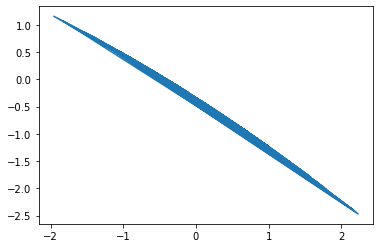

In [59]:
# afficher avec matplotlib les résultats de notre model par rapport au dataset
plt.plot(x, model(X, theta))
plt.show()

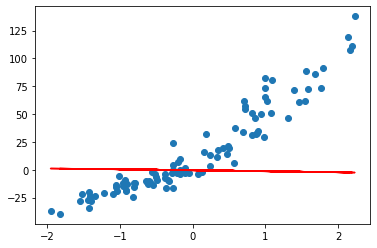

In [60]:
# en comparaison avec le dataset
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')
plt.show() #pas très bon modèle

## 3. FONCTION COUT

In [61]:
# erreur quadratique moyenne
def fonction_cout(X, y, theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [62]:
fonction_cout(X, y, theta) #fort coût car on veut qu'il tende vers 0

932.5701702702196

## DESCENTE DE GRADIENT

### GESTION DU GRADIENT

In [63]:
# fonction pour calculer le gradient
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

### GESTION DE LA DESCENTE DE GRADIENT

In [64]:
# fonction de la descente de gradient itérative
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) 
    return theta

## 4. ENTRAINEMENT DU MODELE

In [125]:
theta_final = gradient_descente(X, y, theta, learning_rate=0.001, n_iterations=10000)

In [126]:
theta_final

array([[ 7.31294449],
       [34.14168965],
       [ 7.68967775]])

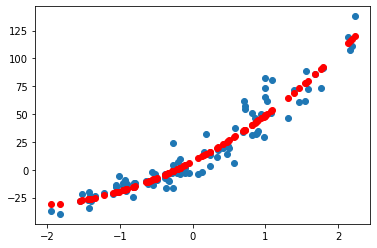

In [127]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')
plt.show()
# un peu mieux mais pas suffisant, l'apprentissage n'est pas terminé

In [128]:
# faire continuer l'apprentissage 
# soit en refait des itérations
# soit on joue sur le learning rate .. .on fait de trop petit pas ==> 0.01.

In [129]:
theta_final_2 = gradient_descente(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [130]:
theta_final_2

array([[ 7.31223509],
       [34.14213966],
       [ 7.69087906]])

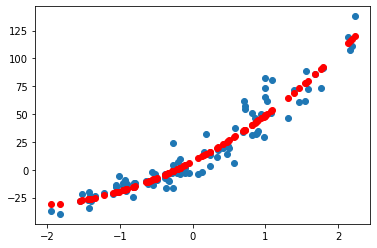

In [131]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final_2)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')
plt.show()
# oui bien meilleur résultat en réentrainant le modèle

## 5. COURBE D'APPRENTISSAGE

In [132]:
# comment tracer la minimisation de notre fonction coût avec le nombre d'itérations?
# comment voir si la machine réussi à bien apprendre?
# en modifiant la descente de gradient
def gradient_descente_bis(X, y, theta, learning_rate, n_iterations):
    # tableau rempli de zéro de dimension le nbre d'itérations
    cost_history= np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) 
        # on sauvegarde le coût pour chaque itération
        cost_history[i] = fonction_cout(X, y, theta)
    return theta, cost_history

In [133]:
theta_final_2, cost_history = gradient_descente_bis(X, y, theta,
                                                    learning_rate=0.01, n_iterations=10000)

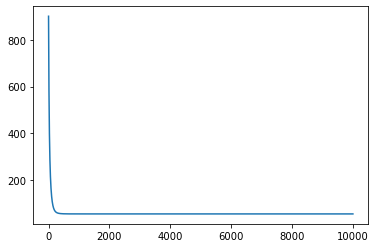

In [135]:
# tracer la progression de la fonction cout en fonction de l'itération
plt.plot(range(10000), cost_history)
plt.show()
# on peut voir que passer 400 itérations la machine ne progresse plus

## 6 COEFFICIENT DE DETERMINATION

In [136]:
# comment évaluer la performance de notre modèle en utilisant le coefficient de détermination
# coef de détermination = R au carré - méthode des moindes carrés
def coefficient_determination(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [137]:
#  calcul pour y et vecteur prédiction
coefficient_determination(y, predictions)
# 0.95 proche de 1 ==> OK maispeu faire mieux

0.9274739392527402